In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import sys
from generalist_group123 import Generalist
from evoman.environment import Environment
from demo_controller import player_controller

pygame 2.6.0 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
def get_neuron_values(exp):
    with open(exp) as f:
        neuron_values = []
        for line in f:
            neuron_values.append(float(line))
    neuron_values = np.array(neuron_values)
    return neuron_values


In [4]:
def evaluate_best(neuron_values):
    env = Environment(
                experiment_name="experiments-generalist/run1_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=300_hiddensize=10_u=1_l=-1_fitnessfunc=gradual_init=kaiming_seed=1",
                enemies=[1],
                playermode="ai",
                fullscreen = False,
                player_controller=player_controller(10),
                enemymode="static",
                level=2,
                sound = "off",
                speed = "fastest")

    enemy_killed = 0
    ig = 0
    for enemy in range(1,9):
        f, p, e, t = env.run_single(pcont=neuron_values, enemyn=enemy, econt=None)
        # print(f"Enemy {enemy}, fitness: {f}, player: {p}, enemy: {e}")
        if e == 0:
            enemy_killed += 1
        ig += p - e

    print(f"Killed {enemy_killed} enemies with Individual Gain {ig}")
    return ig

In [5]:
def get_results_run(experiment_name, length=41):
    data = []
    with open(f'./{experiment_name}/results.txt', 'r') as f:
        for line in f:
            data.append(line.strip().split()[2:6])
    if len(data) != length:
        print(experiment_name)
        print(len(data))
        
    data = np.array(data, dtype=float)
    bests = data[:300, 0]
    means = data[:300, 1]
    return bests, means

def get_results_run_CMA(experiment_name, length=41):
    data = []
    with open(f'./{experiment_name}/results.txt', 'r') as f:
        for line in f:
            data.append(line.strip().split()[2:6])
    if len(data) != length:
        print(experiment_name)
        print(len(data))
        
    data = np.array(data, dtype=float)
    bests = data[:, 0]
    means = data[:, 2]
    return bests[:300], means[:300]

results = np.array([get_results_run_CMA(f"experiments-generalist/run{i}_popusize=100_enemy=[2, 3, 5, 7]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={i}",length=1000 ) for i in range(1,11)])

print(results.shape)
bests = results[:, 0, :].mean(axis=0)
std_best = results[:, 0, :].std(axis=0)

means = results[:, 1, :].mean(axis=0)
std_mean = results[:, 1, :].std(axis=0)


(10, 2, 300)


In [6]:
def plot_1(generations, bests, means):
    
    # Plot for each enemy
    plt.figure(figsize=(12, 6))
    # Plot mean fitness
    plt.plot(generations, bests, label='Best Fitness')
    # Plot max fitness
    plt.plot(generations, means, label='Mean Fitness')

    plt.title(f'Fitness Comparison for', fontsize=18)
    plt.xlabel('Generations', fontsize=16)
    plt.ylabel('Fitness', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=18)
    plt.grid()
    plt.tight_layout()
    plt.ylim(0,100)
    plt.show()

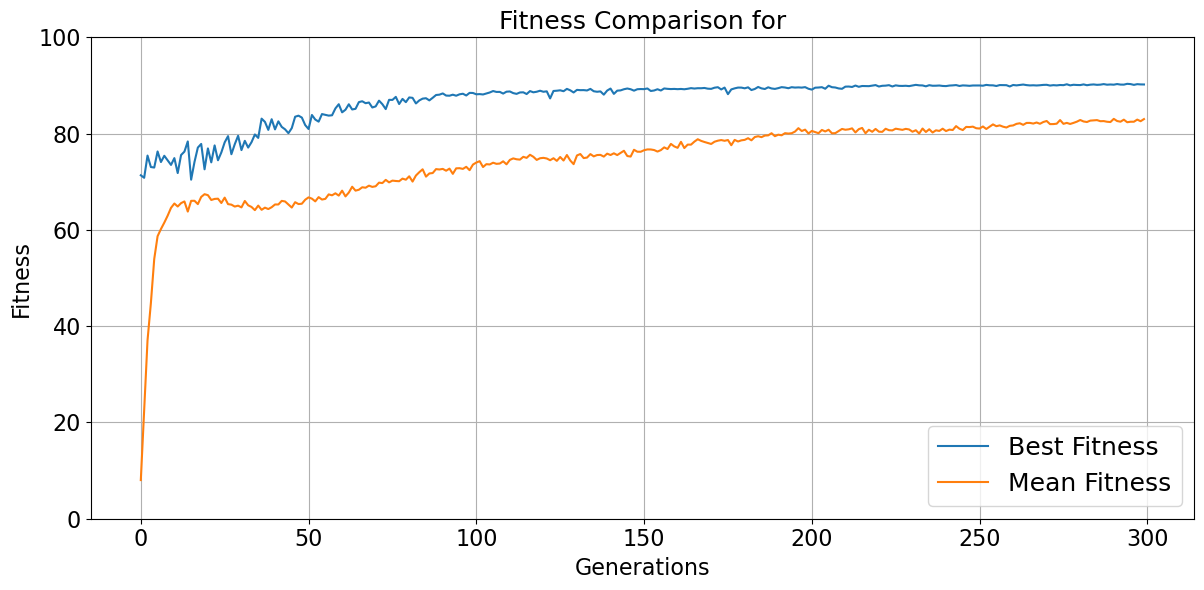

In [7]:
generations = range(len(bests))
plot_1(generations, bests, means)

In [8]:
def plot_3(generations, bests, means, std_best, std_mean):
    
    # Plot for each enemy
    plt.figure(figsize=(12, 6))
    # Plot mean fitness
    plt.plot(generations, bests, label='Best Fitness', color="#7F4FB3")
    plt.fill_between(generations,
                        bests - std_best,
                        bests + std_best,
                        alpha=0.3, color="#7F4FB3", label="Best Std")
    # Plot max fitness
    plt.plot(generations, means, label='Mean Fitness', color="#E67E00")
    plt.fill_between(generations,
                        means - std_mean,
                        means + std_mean,
                        alpha=0.3, color="#E67E00", label="Mean Std")

    plt.title(f'Fitness Comparison for', fontsize=18)
    plt.xlabel('Generations', fontsize=16)
    plt.ylabel('Fitness', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=18)
    plt.grid()
    plt.tight_layout()
    plt.ylim(0,100)
    plt.show()

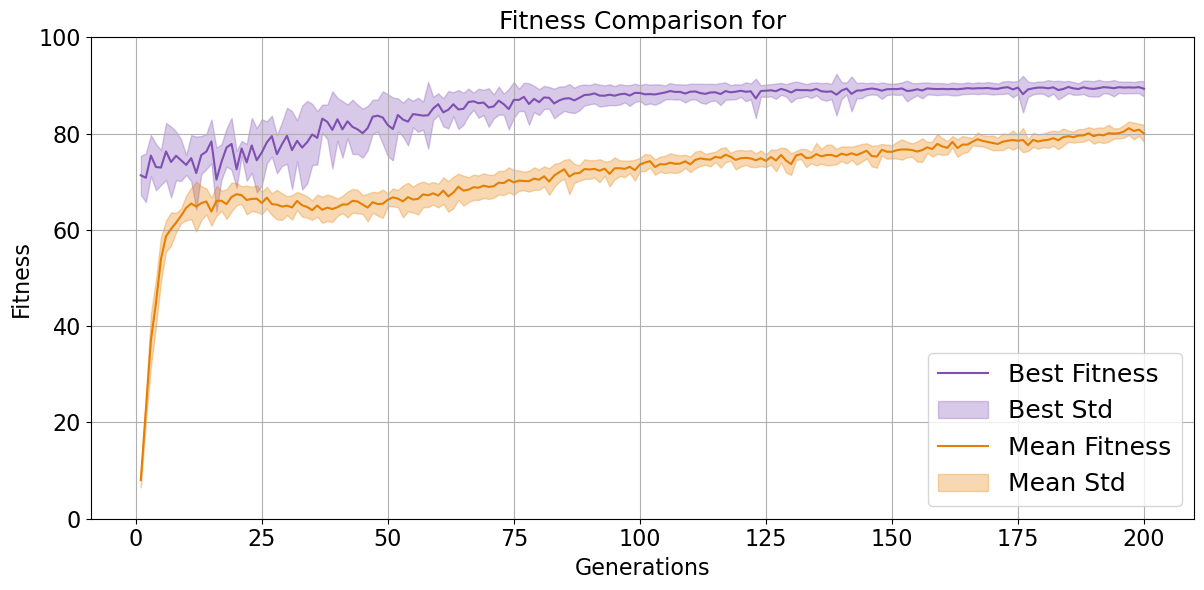

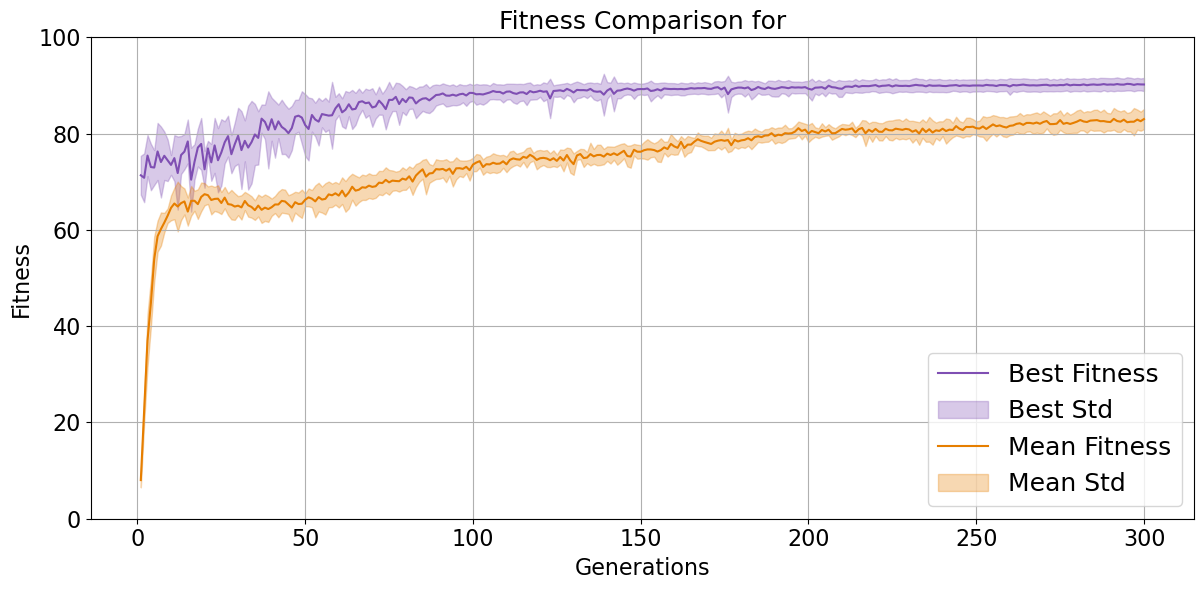

In [9]:
untill = 200
plot_3(range(1, untill + 1), bests[:untill], means[:untill], std_best[:untill], std_mean[:untill])
plot_3(range(1, len(bests)+1), bests, means, std_best, std_mean)

In [10]:
import matplotlib.pyplot as plt

def plot_2(generations, enemy_names_1, bests_1, means_1, bests_std_1, means_std_1, 
           bests_2, means_2, bests_std_2, means_std_2):
    fig, axs = plt.subplots(1, 2, figsize=(18, 4), sharey=True)
    small_font = 20
    big_font = 21
    
    for enemy_idx in range(2):
        ax = axs[enemy_idx]
        
        # Plot mean fitness for the second set
        ax.plot(generations, means_2[enemy_idx, :], label='Mean Fitness SDFF', color="#7F4FB3", linestyle='--')
        ax.fill_between(generations,
                        means_2[enemy_idx, :] - means_std_2[enemy_idx, :],
                        means_2[enemy_idx, :] + means_std_2[enemy_idx, :],
                        alpha=0.1, color="#7F4FB3", label="SDFF Std")

        # Plot best fitness for the second set
        ax.plot(generations, bests_2[enemy_idx, :], label='Best Fitness SDFF', color="#7F4FB3")
        ax.fill_between(generations,
                        bests_2[enemy_idx, :] - bests_std_2[enemy_idx, :],
                        bests_2[enemy_idx, :] + bests_std_2[enemy_idx, :],
                        alpha=0.1, color="#7F4FB3")
        
        # Plot mean fitness for the first set
        ax.plot(generations, means_1[enemy_idx, :], label='Mean Fitness OSFF', color="#E67E00", linestyle='--')
        ax.fill_between(generations,
                        means_1[enemy_idx, :] - means_std_1[enemy_idx, :],
                        means_1[enemy_idx, :] + means_std_1[enemy_idx, :],
                        alpha=0.1, color="#E67E00", label="OSFF Std")

        # Plot best fitness for the first set
        ax.plot(generations, bests_1[enemy_idx, :], label='Best Fitness OSFF', color="#E67E00")
        ax.fill_between(generations,
                        bests_1[enemy_idx, :] - bests_std_1[enemy_idx, :],
                        bests_1[enemy_idx, :] + bests_std_1[enemy_idx, :],
                        alpha=0.1, color="#E67E00")
        
        # Set title for each subplot
        ax.set_title(f'Fitness Comparison for {enemy_names_1[enemy_idx]}', fontsize=big_font)

        # Set labels for the first and last plots
        if enemy_idx == 0:
            ax.set_ylabel('Fitness', fontsize=small_font)
            
        # Set common properties
        ax.set_xlabel('Generations', fontsize=small_font)
        ax.tick_params(axis='both', labelsize=small_font)
        ax.set_yticks([0, 20, 40, 60, 80, 100])
        ax.grid()
    
    handles, labels = axs[1].get_legend_handles_labels()

    order = [5, 2, 3, 0, 4, 1]

    fig.legend([handles[idx] for idx in order], 
            [labels[idx] for idx in order], 
            loc='center left', bbox_to_anchor=(0.94, 0.55), 
            fontsize=small_font-4, title='Fitness Metrics', 
            title_fontsize=small_font-2)
    
    plt.tight_layout(rect=[0, 0, 0.95, 0.98])  
    plt.show()

In [11]:


results_all_step = np.array([get_results_run_CMA(f"experiments-generalist/run{run}_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={run}", length=1000) for run in range(1,11)])
best_results_all_step = results_all_step[:, 0, :]
mean_results_all_step = results_all_step[:, 1, :]
results_partial_step = np.array([get_results_run_CMA(f"experiments-generalist/run{run}_popusize=100_enemy=[2, 3, 5, 7]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={run}", length=1000) for run in range(1,11)])
best_results_partial_step = results_partial_step[:, 0, :]
mean_results_partial_step = results_partial_step[:, 1, :]

results_all_gradual = np.array([get_results_run_CMA(f"experiments-generalist/run{run}_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=300_hiddensize=10_u=1_l=-1_fitnessfunc=gradual_init=kaiming_seed={run}", length=300) for run in range(1,11)])
best_results_all_gradual = results_all_gradual[:, 0, :]
mean_results_all_gradual = results_all_gradual[:, 1, :]
results_partial_gradual = np.array([get_results_run_CMA(f"experiments-generalist/run{run}_popusize=100_enemy=[2, 3, 5, 7]_gens=300_hiddensize=10_u=1_l=-1_fitnessfunc=gradual_init=kaiming_seed={run}", length=300) for run in range(1,11)])
best_results_partial_gradual = results_partial_gradual[:, 0, :]
mean_results_partial_gradual = results_partial_gradual[:, 1, :]

In [12]:
# best_results_steps = np.vstack((best_results_all_step, best_results_partial_step))
best_results_steps = np.zeros((10, 2, 300))
best_results_steps[:, 0, :] = best_results_all_step
best_results_steps[:, 1, :] = best_results_partial_step
best_results_steps_std = best_results_steps.std(axis=0)
best_results_steps = best_results_steps.mean(axis=0)

mean_results_steps = np.zeros((10, 2, 300))
mean_results_steps[:, 0, :] = mean_results_all_step
mean_results_steps[:, 1, :] = mean_results_partial_step
mean_results_steps_std = mean_results_steps.std(axis=0)
mean_results_steps = mean_results_steps.mean(axis=0)


best_results_gradual = np.zeros((10, 2, 300))
best_results_gradual[:, 0, :] = best_results_all_gradual
best_results_gradual[:, 1, :] = best_results_partial_gradual
best_results_gradual_std = best_results_gradual.std(axis=0)
best_results_gradual = best_results_gradual.mean(axis=0)

mean_results_gradual = np.zeros((10, 2, 300))
mean_results_gradual[:, 0, :] = mean_results_all_gradual
mean_results_gradual[:, 1, :] = mean_results_partial_gradual
mean_results_gradual_std = mean_results_gradual.std(axis=0)
mean_results_gradual = mean_results_gradual.mean(axis=0)

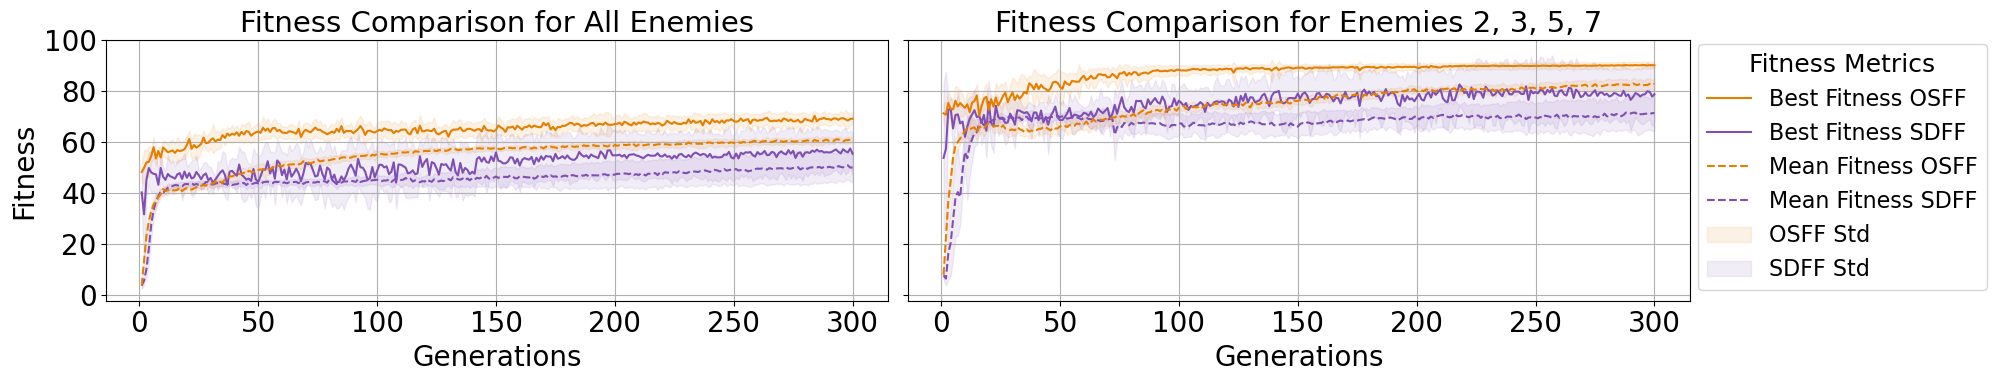

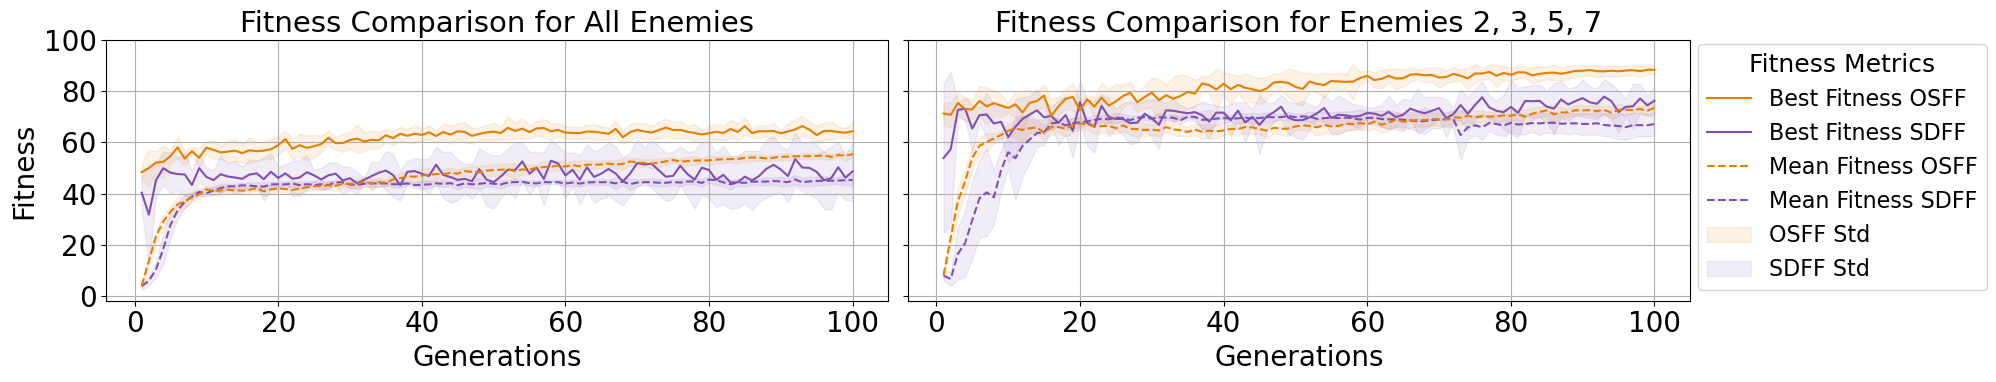

In [13]:
plot_2(range(1, 301), ["All Enemies", "Enemies 2, 3, 5, 7"], 
       best_results_steps, mean_results_steps, best_results_steps_std, mean_results_steps_std,  
       best_results_gradual, mean_results_gradual, best_results_gradual_std, mean_results_gradual_std)

r = 100

plot_2(range(1, r+1), ["All Enemies", "Enemies 2, 3, 5, 7"], 
       best_results_steps[:, :r], mean_results_steps[:, :r], best_results_steps_std[:, :r], mean_results_steps_std[:, :r],  
       best_results_gradual[:, :r], mean_results_gradual[:, :r], best_results_gradual_std[:, :r], mean_results_gradual_std[:, :r])

In [14]:

print("IG OSFF ALL")
ig_step_all = []  #CMA
for run in range(1, 11):
    exp_name = f"experiments-generalist/run{run}_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={run}"
    neuron_values = get_neuron_values(f"{exp_name}/best.txt")
    ig_step_all.append(evaluate_best(neuron_values))
ig_step_all = np.array(ig_step_all)

print("\n\nIG OSFF PARTIAL")
ig_step_partial = [] # CMA
for run in range(1, 11):
    exp_name =  f"experiments-generalist/run{run}_popusize=100_enemy=[2, 3, 5, 7]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={run}"
    neuron_values = get_neuron_values(f"{exp_name}/best.txt")
    ig_step_partial.append(evaluate_best(neuron_values))
ig_step_partial = np.array(ig_step_partial)

print("\n\nIG SDFF ALL")
ig_gradual_all = []
for run in range(1, 11):
    exp_name = f"experiments-generalist/run{run}_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=300_hiddensize=10_u=1_l=-1_fitnessfunc=gradual_init=kaiming_seed={run}"
    neuron_values = get_neuron_values(f"{exp_name}/best.txt")
    ig_gradual_all.append(evaluate_best(neuron_values))
ig_gradual_all = np.array(ig_gradual_all)

print("\n\nIG SDFF partial")
ig_gradual_partial = []
for run in range(1, 11):
    exp_name = f"experiments-generalist/run{run}_popusize=100_enemy=[2, 3, 5, 7]_gens=300_hiddensize=10_u=1_l=-1_fitnessfunc=gradual_init=kaiming_seed={run}"
    neuron_values = get_neuron_values(f"{exp_name}/best.txt")
    ig_gradual_partial.append(evaluate_best(neuron_values))
ig_gradual_partial = np.array(ig_gradual_partial)

IG OSFF ALL

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 78.6000000000011

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 21.80000000000103

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 153.00000000000114

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 81.20000000000108

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 255.80000000000092

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 59.20000000000101

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 64.40000000000103

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 129.00000000000108

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individual Gain 38.800000000001035

MESSAGE: Pygame initialized for simulation.
Killed 6 enemies with Individua

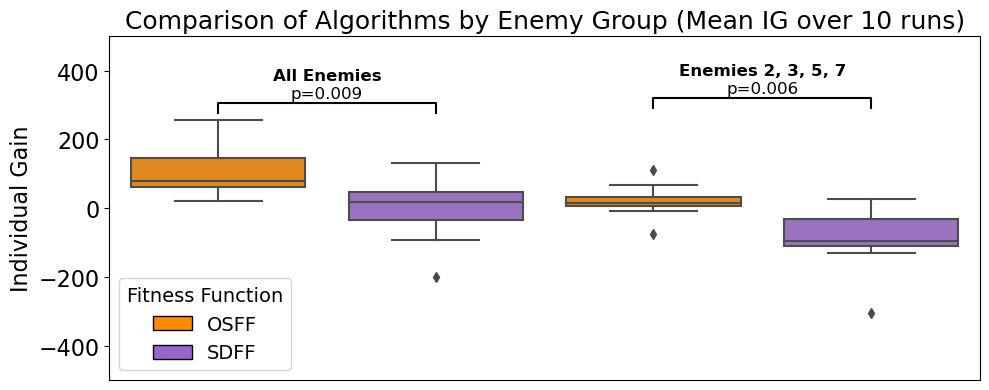

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.patches as mpatches

# Example data

# Prepare data for the boxplot
boxplot_data = [ig_step_all, ig_gradual_all, ig_step_partial, ig_gradual_partial]
labels = ['Step (All Enemies)', 'Gradual (All Enemies)', 'Step (Partial Enemies)', 'Gradual (Partial Enemies)']

# Plotting
plt.figure(figsize=(10, 6))
sns.set_palette(sns.color_palette(["#FF8C00", "#9966CC"]))

bplot = sns.boxplot(data=boxplot_data, palette=sns.color_palette(n_colors=2))

plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45, fontsize=14)
plt.title('Comparison of Algorithms by Enemy Group (Mean IG over 10 runs)', fontsize=18)
plt.ylabel('Individual Gain', fontsize=16)
plt.yticks(fontsize=16)

# Perform t-tests
_, p_value_all = ttest_ind(ig_step_all, ig_gradual_all)
_, p_value_partial = ttest_ind(ig_step_partial, ig_gradual_partial)

p_values = [(0, 1, p_value_all, "All Enemies\n"), (2, 3, p_value_partial, "Enemies 2, 3, 5, 7\n")]

# Annotate p-values and enemy type on the plot
max_y = np.max([np.max(ig_step_all), np.max(ig_gradual_all), np.max(ig_step_partial), np.max(ig_gradual_partial)]) + 20
len_vertical = 15  # Increase the height of the vertical bars

for i, (x1, x2, p_value, enemy_type) in enumerate(p_values):
    # Plot connecting lines with a taller vertical bar
    plt.plot([x1, x1, x2, x2], 
             [max_y + i * len_vertical, max_y + (i + 2) * len_vertical, max_y + (i + 2) * len_vertical, max_y + i * len_vertical], 
             color='k')
    
    # Add text for enemy type
    plt.text((x1 + x2) / 2, max_y + (i + 2) * len_vertical + len_vertical * 0.5, 
             f'{enemy_type}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Add text for p-value
    plt.text((x1 + x2) / 2, max_y + (i + 2) * len_vertical + 6, 
             f'p={p_value:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()

# Add legend for mutation types
correlated_patch = mpatches.Patch(edgecolor="black", facecolor="#FF8C00", label='OSFF')
uncorrelated_patch = mpatches.Patch(edgecolor="black", facecolor="#9966CC", label='SDFF')
plt.legend(title='Fitness Function', handles=[correlated_patch, uncorrelated_patch], loc='lower left', frameon=True, fontsize=14, title_fontsize=14)
plt.gca().axes.get_xaxis().set_visible(False)
plt.ylim(-500, 500)
plt.show()


In [17]:
def evaluate_best_all_info(neuron_values):
    env = Environment(
                experiment_name=f"experiments-generalist/run{5}_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={5}",
                enemies=[1],
                playermode="ai",
                fullscreen = False,
                player_controller=player_controller(10),
                enemymode="static",
                level=2,
                sound = "off",
                speed = "fastest")

    enemy_killed = 0
    ig = 0
    for enemy in range(1,9):
        f, p, e, t = env.run_single(pcont=neuron_values, enemyn=enemy, econt=None)
        print(f"Enemy {enemy}, fitness: {f}, player: {p}, enemy: {e}")
        if e == 0:
            enemy_killed += 1
        ig += p - e

    print(f"Killed {enemy_killed} enemies with Individual Gain {ig}")
    return ig

print("CMA")
best_result = evaluate_best_all_info(get_neuron_values(f"experiments-generalist/run{5}_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={5}/best.txt"))



CMA

MESSAGE: Pygame initialized for simulation.
Enemy 1, fitness: 21.269900217026425, player: 0, enemy: 70.0
Enemy 2, fitness: 93.37504998251859, player: 88, enemy: 0
Enemy 3, fitness: 91.25060701409174, player: 70, enemy: 0
Enemy 4, fitness: 30.2962175253438, player: 0, enemy: 60.0
Enemy 5, fitness: 90.80901301948917, player: 64.00000000000034, enemy: 0
Enemy 6, fitness: 84.21105438238982, player: 0.40000000000023406, enemy: 0
Enemy 7, fitness: 93.7221602000491, player: 86.20000000000013, enemy: 0
Enemy 8, fitness: 92.09598249381268, player: 77.20000000000022, enemy: 0
Killed 6 enemies with Individual Gain 255.80000000000092


In [18]:
print("IG OSFF ALL")
ig_step_all = []  #CMA
for run in range(1, 11):
    exp_name = f"experiments-generalist/run{run}_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={run}"
    neuron_values = get_neuron_values(f"{exp_name}/best.txt")
    ig_step_all.append(evaluate_best_all_info(neuron_values))
ig_step_all = np.array(ig_step_all)

print("\n\nIG OSFF PARTIAL")
ig_step_partial = [] # CMA
for run in range(1, 11):
    exp_name =  f"experiments-generalist/run{run}_popusize=100_enemy=[2, 3, 5, 7]_gens=1000_hiddensize=10_u=1_l=-1_fitnessfunc=steps_init=kaiming_seed={run}"
    neuron_values = get_neuron_values(f"{exp_name}/best.txt")
    ig_step_partial.append(evaluate_best_all_info(neuron_values))
ig_step_partial = np.array(ig_step_partial)


print("\n\nIG SDFF ALL")
ig_gradual_all = []
for run in range(1, 11):
    exp_name = f"experiments-generalist/run{run}_popusize=100_enemy=[1, 2, 3, 4, 5, 6, 7, 8]_gens=300_hiddensize=10_u=1_l=-1_fitnessfunc=gradual_init=kaiming_seed={run}"
    neuron_values = get_neuron_values(f"{exp_name}/best.txt")
    ig_gradual_all.append(evaluate_best_all_info(neuron_values))
ig_gradual_all = np.array(ig_gradual_all)

print("\n\nIG SDFF partial")
ig_gradual_partial = []
for run in range(1, 11):
    exp_name = f"experiments-generalist/run{run}_popusize=100_enemy=[2, 3, 5, 7]_gens=300_hiddensize=10_u=1_l=-1_fitnessfunc=gradual_init=kaiming_seed={run}"
    neuron_values = get_neuron_values(f"{exp_name}/best.txt")
    ig_gradual_partial.append(evaluate_best_all_info(neuron_values))
ig_gradual_partial = np.array(ig_gradual_partial)

IG OSFF ALL

MESSAGE: Pygame initialized for simulation.
Enemy 1, fitness: 21.25699681219052, player: 0, enemy: 70.0
Enemy 2, fitness: 90.84704041507838, player: 64, enemy: 0
Enemy 3, fitness: 87.98322890233342, player: 36, enemy: 0
Enemy 4, fitness: 21.41275134159975, player: 0, enemy: 70.0
Enemy 5, fitness: 90.75650369121833, player: 63.40000000000034, enemy: 0
Enemy 6, fitness: 84.45105438238983, player: 2.8000000000002343, enemy: 0
Enemy 7, fitness: 89.50506424239104, player: 47.2000000000003, enemy: 0
Enemy 8, fitness: 84.34621389609809, player: 5.200000000000234, enemy: 0
Killed 6 enemies with Individual Gain 78.6000000000011

MESSAGE: Pygame initialized for simulation.
Enemy 1, fitness: 3.228558876869984, player: 0, enemy: 90.0
Enemy 2, fitness: 89.33740496697304, player: 44, enemy: 0
Enemy 3, fitness: 84.78322890233343, player: 4, enemy: 0
Enemy 4, fitness: 65.8472673052959, player: 0, enemy: 20.0
Enemy 5, fitness: 90.94254710353533, player: 64.60000000000034, enemy: 0
Enemy 6,